In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt

import os
os.chdir("../../scVI/")
os.getcwd()
save_path = '../CSF/Notebooks/'

In [2]:
latent_u = np.load(save_path + 'UMAP/all_dataset.umap.npy')
celllabels = np.load(save_path + 'meta/celllabels.npy')
celltype, labels = np.unique(celllabels, return_inverse=True)
isMS = np.load(save_path+'meta/isMS.npy')
isCSF = np.load(save_path+'meta/isCSF.npy')
validclusters = (celllabels!='Mono Doublet') & \
(celllabels!='contamination1') & \
(celllabels!='doublet') & \
(celllabels!='B cell doublets') & \
(celllabels!='RBC')

In [3]:
colors = ['#ff0000', '#e30000', '#c70000', '#732b20', '#c7601c', '#ff9924', '#735210', '#ab9f00', '#eeff00', '#2b5724', '#1cc749', '#1cc7a5', '#5fc9e3', '#24b6ff', '#205773', '#3061ab', '#001f73', '#6b7fff', '#601cc7', '#8f3c89', '#ff24d3', '#570023', '#ff4778']


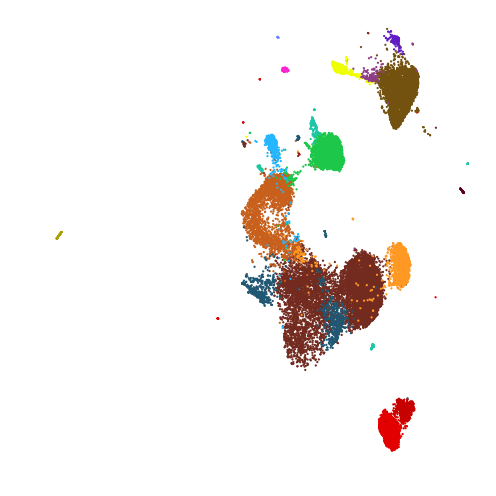

In [5]:

fig, ax = plt.subplots(figsize=(7, 7))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*(isCSF==False)*isMS
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
#         ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure5/cluster_umap.MS_blood.png',dpi=300)


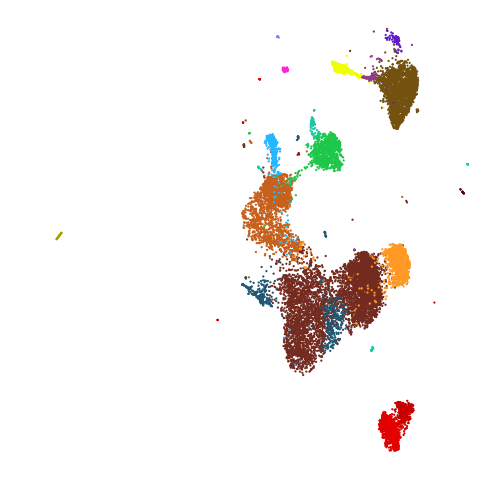

In [6]:

fig, ax = plt.subplots(figsize=(7, 7))

for i,x in enumerate(np.unique(celllabels)):
    if (x != 'contamination1') and (x!='doublet') and (x!='Mono Doublet') and (x!='B cell doublets') and (x!='RBC'):
        idx = (celllabels==x)*(isCSF==False)*(isMS==False)
        ax.scatter(latent_u[idx, 0], latent_u[idx, 1],label=x,edgecolors='none',c=colors[i],s=5)
#         ax.text(mean_pos[i][0]+1, mean_pos[i][1], x, fontsize=30,color=colors[i])
        
plt.axis("off")
plt.tight_layout()
plt.savefig(save_path+'figures/Figure5/cluster_umap.control_blood.png',dpi=300)


In [ ]:
with open(save_path + 'dataset/all_datasets.pkl', 'rb') as f:
    gene_dataset = pickle.load(f)

logX = np.log10(1+gene_dataset.X.todense())
scaling_factor = logX.mean(axis=1)
norm_X = logX - scaling_factor.reshape(len(scaling_factor), 1)

labels = np.load(save_path + 'meta/CD4.clusters.npy')
celltypes = np.unique(labels).astype(str)

celllabels = np.load(save_path + 'meta/celllabels.npy')
isCD4 = celllabels=='CD4'
CD4labels = np.repeat(-1,len(celllabels))
CD4labels[isCD4] = labels